## Run the below cell compulsorily

In [3]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
market_cust_data=pd.read_csv("files_for_lab/csv_files/marketing_customer_analysis.csv")

In [ ]:
# 1. Show the dataframe shape.
market_cust_data.shape
# Drop the Unnamed column
market_cust_data.drop(['Unnamed: 0'], axis=1,inplace=True)

In [ ]:
# 2. Standardize header names.
market_cust_data.columns = [col.lower().replace(' ','_') for col in market_cust_data.columns]

In [ ]:
# 3. Which columns are numerical?
list(market_cust_data.describe(include=[int,float]).T.index)

In [ ]:
# 4. Which columns are categorical?
list(market_cust_data.describe(include=[object]).T.index)

In [ ]:
# 5. Check and deal with NaN values.
market_cust_data.isna().sum()

## Run below cell before running Transformation Function

In [4]:
def convert_nan_to_mode(df,colname):
    if df[colname].isna().value_counts(normalize=True)[True]<0.1:
        df[colname] = df[colname].fillna(df[colname].value_counts().index[0])
    return df

In [ ]:
def freq_cnt_perc(df,colname):
    return (round(df[colname].value_counts(normalize=True,dropna=False)*100,2)).astype(str) + '%'

In [ ]:
freq_cnt_perc(market_cust_data,'state')

In [ ]:
# As NaN account for less than 10%, we can safely replace the NaNs with Mode (most frequent value)
market_cust_data=convert_nan_to_mode(market_cust_data,'state')
freq_cnt_perc(market_cust_data,'state')

In [ ]:
freq_cnt_perc(market_cust_data,'response')

In [ ]:
# # As NaN account for less than 10%, we can safely replace the NaNs with Mode (most frequent value)
market_cust_data=convert_nan_to_mode(market_cust_data,'response')
freq_cnt_perc(market_cust_data,'response')

In [ ]:
freq_cnt_perc(market_cust_data,'months_since_last_claim')

In [ ]:
# Even though the NaNs account for less than 10% of the total values of this column, the column values are categorical and
# are evenly distributed in all the categories. Moving NaNs to any of the categories will 'skew' the distribution. The best
# way would be to delete the rows having NaNs in this column.

market_cust_data = market_cust_data[market_cust_data['months_since_last_claim'].notna()]
freq_cnt_perc(market_cust_data,'months_since_last_claim')

In [ ]:
# The NaNs in column 'number_of_open_complaints' get automatically cleared after removing rows in column 
# 'months_since_last_claim' containing NaNs

freq_cnt_perc(market_cust_data,'number_of_open_complaints')

In [ ]:
freq_cnt_perc(market_cust_data,'vehicle_class')

In [ ]:
# # As NaN account for less than 10%, we can safely replace the NaNs with Mode (most frequent value)
market_cust_data=convert_nan_to_mode(market_cust_data,'vehicle_class')
freq_cnt_perc(market_cust_data,'vehicle_class')

In [ ]:
freq_cnt_perc(market_cust_data,'vehicle_size')

In [ ]:
# # As NaN account for less than 10%, we can safely replace the NaNs with Mode (most frequent value)
market_cust_data=convert_nan_to_mode(market_cust_data,'vehicle_size')
freq_cnt_perc(market_cust_data,'vehicle_size')

In [ ]:
freq_cnt_perc(market_cust_data,'vehicle_type')

In [ ]:
# As NaNs account for more than 50% of the values in this column, we cannot simply remove the rows. We have to assign a default
# value to the NaNs which is not equal to the most frequent non null value 'A' otherwise the distribution will again get 'skewed'.
market_cust_data['vehicle_type'] = market_cust_data['vehicle_type'].fillna('U')

In [ ]:
# Check for NaN values once again.
market_cust_data.isna().sum()

In [ ]:
# 6. Extract the months from the dataset and store in a separate column. 
market_cust_data['effective_to_date']=pd.to_datetime(market_cust_data['effective_to_date'],errors='coerce')
market_cust_data['effective_to_month']=market_cust_data['effective_to_date'].apply(lambda x : x.month)
market_cust_data[market_cust_data['effective_to_month'].isin([1,2,3])]

## Transformation Function

In [5]:
# 7. BONUS: Transformation Function

# NOTE: Run cell 1 and def convert_nan_to_mode(df,colname) function before running this transformation function.

def transform_df(df):
    # Drop the Unnamed column
    df.drop(['Unnamed: 0'], axis=1,inplace=True)
    # 2. Standardize header names.
    df.columns = [col.lower().replace(' ','_') for col in df.columns] 
    # 3. Which columns are numerical?
    list(df.describe(include=[int,float]).T.index)
    # 4. Which columns are categorical?
    list(df.describe(include=[object]).T.index)
    # 5. Check and deal with NaN values.
    df.isna().sum()
    # As NaN account for less than 10%, we can safely replace the NaNs with Mode (most frequent value)
    df=convert_nan_to_mode(df,'state')
    # As NaN account for less than 10%, we can safely replace the NaNs with Mode (most frequent value)
    df=convert_nan_to_mode(df,'response')
    # Even though the NaNs account for less than 10% of the total values of this column, the column values are categorical and
    # are evenly distributed in all the categories. Moving NaNs to any of the categories will 'skew' the distribution. The best
    # way would be to delete the rows having NaNs in this column.
    df = df[df['months_since_last_claim'].notna()]
    # As NaN account for less than 10%, we can safely replace the NaNs with Mode (most frequent value)
    df=convert_nan_to_mode(df,'vehicle_class')
    # As NaN account for less than 10%, we can safely replace the NaNs with Mode (most frequent value)
    df=convert_nan_to_mode(df,'vehicle_size')
    # As NaNs account for more than 50% of the values in this column, we cannot simply remove the rows. We have to assign a default
    # value to the NaNs which is not equal to the most frequent non null value 'A' otherwise the distribution will again get 'skewed'.
    df['vehicle_type'] = df['vehicle_type'].fillna('U')
    # 6. Extract the months from the dataset and store in a separate column. 
    df['effective_to_date']=pd.to_datetime(df['effective_to_date'],errors='coerce')
    df['effective_to_month']=df['effective_to_date'].apply(lambda x : x.month)
    df[df['effective_to_month'].isin([1,2,3])]
    return df

In [6]:
market_cust_data=transform_df(market_cust_data)

# lab-customer-analysis-round-3

In [12]:
# 1. Show DataFrame info.
market_cust_data

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,effective_to_month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,Suburban,Married,61,7.0,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,U,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,Suburban,Single,64,3.0,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,U,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,Suburban,Single,100,34.0,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,Suburban,Single,97,10.0,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
5,HO81102,California,4745.181764,No,Basic,High School or Below,2011-02-14,Employed,M,50549,Suburban,Divorced,61,2.0,73,0.0,7,Personal Auto,Personal L3,Offer1,Agent,292.800000,Four-Door Car,Medsize,A,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2011-02-24,Unemployed,M,0,Suburban,Single,187,14.0,32,0.0,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A,2
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,Urban,Married,65,7.0,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,Rural,Married,201,11.0,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,U,2
10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,64195,Urban,Divorced,158,0.0,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


In [ ]:
# 2. Describe DataFrame.
market_cust_data.describe().T

<AxesSubplot:>

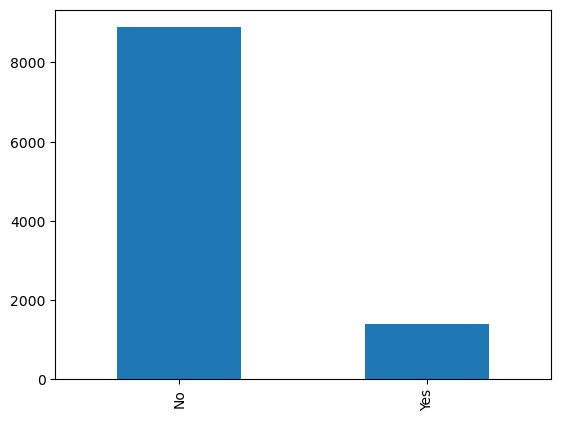

In [43]:
# 3. Show a plot of the total number of responses.

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

market_cust_data['response'].value_counts().plot(kind='bar')

In [14]:
# 4. Show a plot of the response rate by the sales channel.
market_cust_data['response_numeric']=market_cust_data['response'].apply(lambda x : 1 if x=='Yes' else 0)

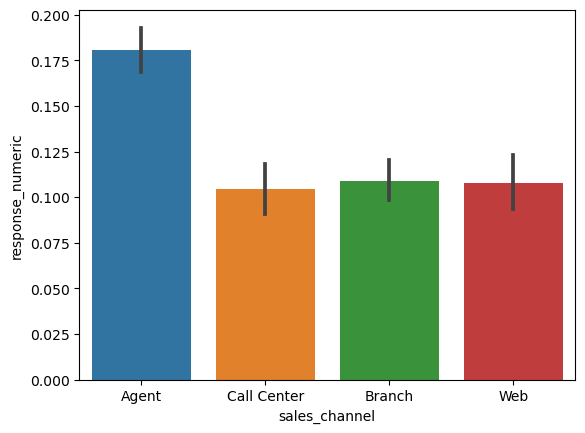

In [48]:
sns.barplot(x="sales_channel", y="response_numeric", data=market_cust_data)
plt.show()

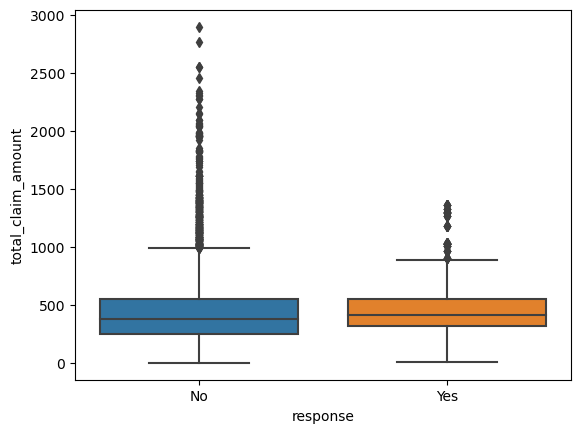

In [65]:
# 5. Show a plot of the response rate by the total claim amount.
sns.boxplot(x = 'response',y='total_claim_amount', data=market_cust_data)
plt.show()

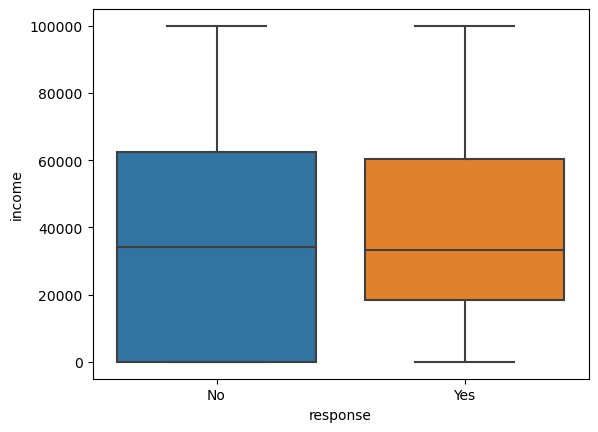

In [64]:
# 6. Show a plot of the response rate by income.
sns.boxplot(x = 'response',y='income', data=market_cust_data)
plt.show()